In [1]:
# install.packages('packcircles', version = '0.3.6')

In [2]:
library(packcircles)
library(ggplot2)
# library(ggrepel) library(dplyr)

In [3]:
library("arrow")
uniprot_data <- read_parquet("uniprot_sprot_taxonomy_summary_with_domains.parquet")
head(uniprot_data)


Attaching package: ‘arrow’


The following object is masked from ‘package:utils’:

    timestamp




organism,reviewed_count,unreviewed_count,pdb_structures_count,organism_id,lineage,type,type_merge_microbes,superdomain,domain,kingdom
<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
Homo sapiens,20417,0,8511,9606,Catarrhini; Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Haplorrhini; Hominidae; Homo; Mammalia; Metazoa; Primates; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal
Mus musculus,17228,0,2458,10090,Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Glires; Mammalia; Metazoa; Muridae; Murinae; Muroidea; Mus; Myomorpha; Rodentia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal
Arabidopsis thaliana,16396,0,1057,3702,Arabidopsis; Brassicaceae; Brassicales; Camelineae; Embryophyta; Eukaryota; Gunneridae; Magnoliopsida; Pentapetalae; Spermatophyta; Streptophyta; Tracheophyta; Viridiplantae; eudicotyledons; malvids; rosids,Plant,Plant,Cellular Life,Eukaryota,Plant
Rattus norvegicus,8209,0,724,10116,Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Glires; Mammalia; Metazoa; Muridae; Murinae; Muroidea; Myomorpha; Rattus; Rodentia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal
Saccharomyces cerevisiae (strain ATCC 204508 / S288c),6733,0,2114,559292,Ascomycota; Dikarya; Eukaryota; Fungi; Saccharomyces; Saccharomycetaceae; Saccharomycetales; Saccharomycetes; Saccharomycotina,Fungi,Fungi,Cellular Life,Eukaryota,Fungi
Bos taurus,6048,0,560,9913,Artiodactyla; Bos; Bovidae; Bovinae; Chordata; Craniata; Eukaryota; Euteleostomi; Eutheria; Laurasiatheria; Mammalia; Metazoa; Pecora; Ruminantia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal


In [6]:
pdb_data <- read.csv("uniprot_sprot_with_pdb.csv")
head(pdb_data)

,organism,reviewed_count,unreviewed_count,pdb_structures_count,organism_id,lineage,type,type_merge_microbes,superdomain,domain,kingdom,reviewed_count_radius,unreviewed_count_radius,pdb_structures_count_radius
,<chr>,<int>,<int>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,Homo sapiens,20417,20417,8511,9606,Catarrhini; Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Haplorrhini; Hominidae; Homo; Mammalia; Metazoa; Primates; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,80.61596,80.61596,52.04936
2,Mus musculus,17228,17228,2458,10090,Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Glires; Mammalia; Metazoa; Muridae; Murinae; Muroidea; Mus; Myomorpha; Rodentia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,74.05297,74.05297,27.97152
3,Arabidopsis thaliana,16396,16396,1057,3702,Arabidopsis; Brassicaceae; Brassicales; Camelineae; Embryophyta; Eukaryota; Gunneridae; Magnoliopsida; Pentapetalae; Spermatophyta; Streptophyta; Tracheophyta; Viridiplantae; eudicotyledons; malvids; rosids,Plant,Plant,Cellular Life,Eukaryota,Plant,72.24271,72.24271,18.34267
4,Rattus norvegicus,8209,8209,724,10116,Chordata; Craniata; Euarchontoglires; Eukaryota; Euteleostomi; Eutheria; Glires; Mammalia; Metazoa; Muridae; Murinae; Muroidea; Myomorpha; Rattus; Rodentia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,51.11757,51.11757,15.18079
5,Saccharomyces cerevisiae (strain ATCC 204508 / S288c),6733,6733,2114,559292,Ascomycota; Dikarya; Eukaryota; Fungi; Saccharomyces; Saccharomycetaceae; Saccharomycetales; Saccharomycetes; Saccharomycotina,Fungi,Fungi,Cellular Life,Eukaryota,Fungi,46.29450,46.29450,25.94045
6,Bos taurus,6048,6048,560,9913,Artiodactyla; Bos; Bovidae; Bovinae; Chordata; Craniata; Eukaryota; Euteleostomi; Eutheria; Laurasiatheria; Mammalia; Metazoa; Pecora; Ruminantia; Vertebrata,Animal,Animal,Cellular Life,Eukaryota,Animal,43.87640,43.87640,13.35116


### Test with the full code from Arcadia

Cribbed from: https://github.com/Arcadia-Science/2024-protein-universe/blob/v1.0/code/protein-universe-analysis.R and https://github.com/Arcadia-Science/2024-protein-universe/blob/v1.0/code/protein-universe-utils.R#L367

[1] 2617

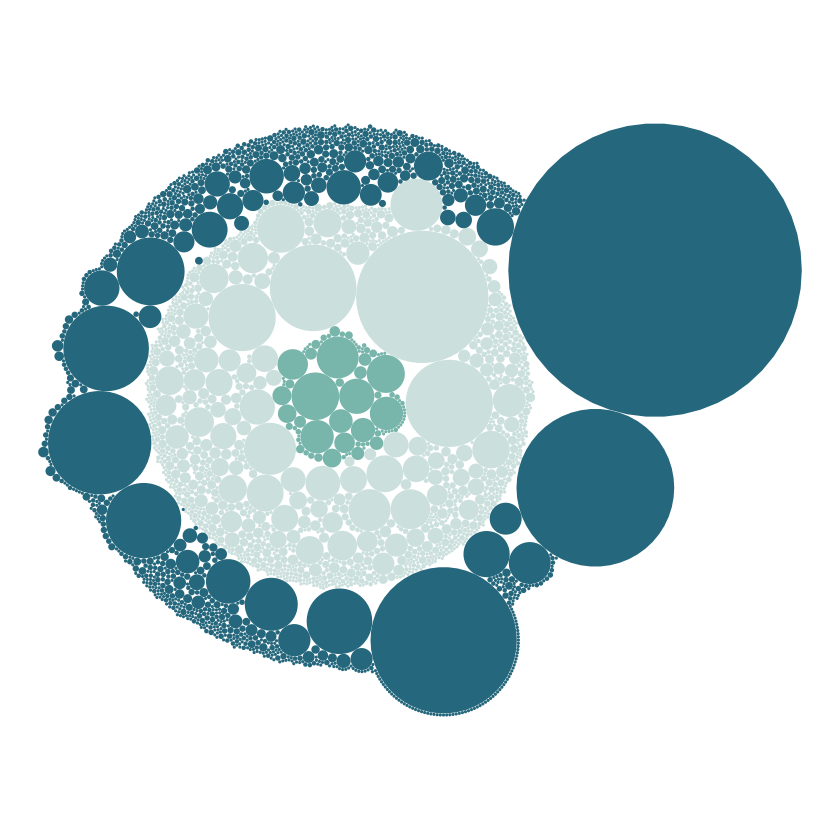

In [14]:


# data <- data.frame(
#   group = pdb_names,
#   value = pdb_species
# )
# data$kingdom <- pdb_taxonomy$superkingdom[match(
#   data$group,
#   pdb_taxonomy$ncbi_id
# )]
# data <- data[data$kingdom %in% c("Archaea", "Bacteria", "Eukaryota"), ]
# data <- data[order(data$kingdom), ]

data <- pdb_data[pdb_data$domain %in% c("Archaea", "Bacteria", "Eukaryota"), ]
data <- data[order(data$domain), ]
nrow(data)

packing <- circleProgressiveLayout(data$pdb_structures_count,
  sizetype = "area"
)
data <- cbind(data, packing)
dat.gg <- circleLayoutVertices(packing,
  npoints = 50
)
dat.gg$value <- rep(data$pdb_structures_count, each = 51)
dat.gg$domain <- rep(data$domain, each = 51)


# Set up color dicitionary for plots
seanome_colors <- c(
'#1e3d6b',
 '#206E82',
 '#45B1A8',
 '#18495A',
 '#89C2BA',
 '#D4E6E4',
 '#2D7A8F',
 '#C4A5B5',
 '#BFA065',
 '#8B7A9F'
)

cols <- seanome_colors[5:7]
names(cols) <- c("Archaea", "Bacteria", "Eukaryota")
cols <- cols[match(
  data$domain,
  names(cols)
)]

ggplot() +

  # Make the bubbles
  geom_polygon(
    data = dat.gg, aes(x,
      y,
      group = id,
      fill = as.factor(domain)
    ),
    # linewidth = 0.2,
    # colour = "black"
  ) +
  scale_fill_manual(values = cols) +
  scale_size_continuous(range = c(1, 4)) +

  # General theme:
  theme_void() +
  theme(legend.position = "none") +
  coord_equal()


## Make this into a function

In [32]:
# Set up color dicitionary for plots
seanome_colors <- c("#1e3d6b", "#206E82", "#45B1A8", "#18495A", "#89C2BA", "#D4E6E4", "#2D7A8F", "#C4A5B5", "#BFA065", "#8B7A9F")



plot_circles <- function(value_col, domain_col, species_col, domains_to_use = c("Archaea", "Bacteria", "Eukaryota"), show_top5 = FALSE) {


  data <- data.frame(species = species_col, value = value_col, domain = domain_col)
  print(names(data))
  print(nrow(data))
  print(head(data$value))

  # Make sure to only use nonzero values
  data <- data[data$value > 0, ]

  data <- data[data$domain %in% domains_to_use, ]
  data <- data[order(data$domain), ]
  print(nrow(data))
  print(head(data$value))

  packing <- circleProgressiveLayout(data$value, sizetype = "area")
  data <- cbind(data, packing)
  dat.gg <- circleLayoutVertices(packing, npoints = 50)
  dat.gg$value <- rep(data$value, each = 51)
  dat.gg$domain <- rep(data$domain, each = 51)



  cols <- seanome_colors[5:7]
  names(cols) <- domains_to_use
  cols <- cols[match(data$domain, names(cols))]

  p <- ggplot() +

  # Make the bubbles
  geom_polygon(
    data = dat.gg, aes(x,
      y,
      group = id,
      fill = as.factor(domain)
    ),
    # linewidth = 0.2,
    # colour = "black"
  ) +
  scale_fill_manual(values = cols) +
  scale_size_continuous(range = c(1, 4)) +

  # General theme:
  theme_void() +
  theme(legend.position = "none") +
  coord_equal()

  if (show_top5) {
    p <- p + # Label top 5 largest groups p <- p + # Label top 5 largest groups
    geom_text(data = head(data[order(-data$value), ], 5), aes(x, y, label = species))
  }


  return(p)
}

[1] "species" "value"   "domain" 
[1] 14755
[1] 8511 2458 1057  724 2114  560
[1] 2617
[1] 224 123  55   7 174  16


Saving 7 x 7 in image


[1] "species" "value"   "domain" 
[1] 14755
[1] 8511 2458 1057  724 2114  560
[1] 2617
[1] 224 123  55   7 174  16


Saving 7 x 7 in image


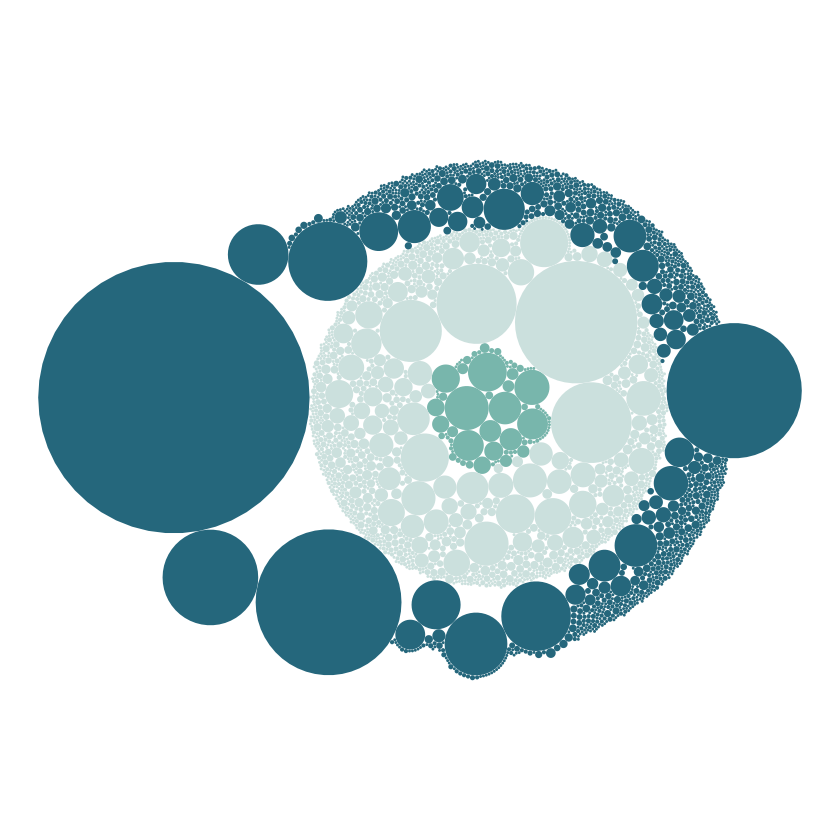

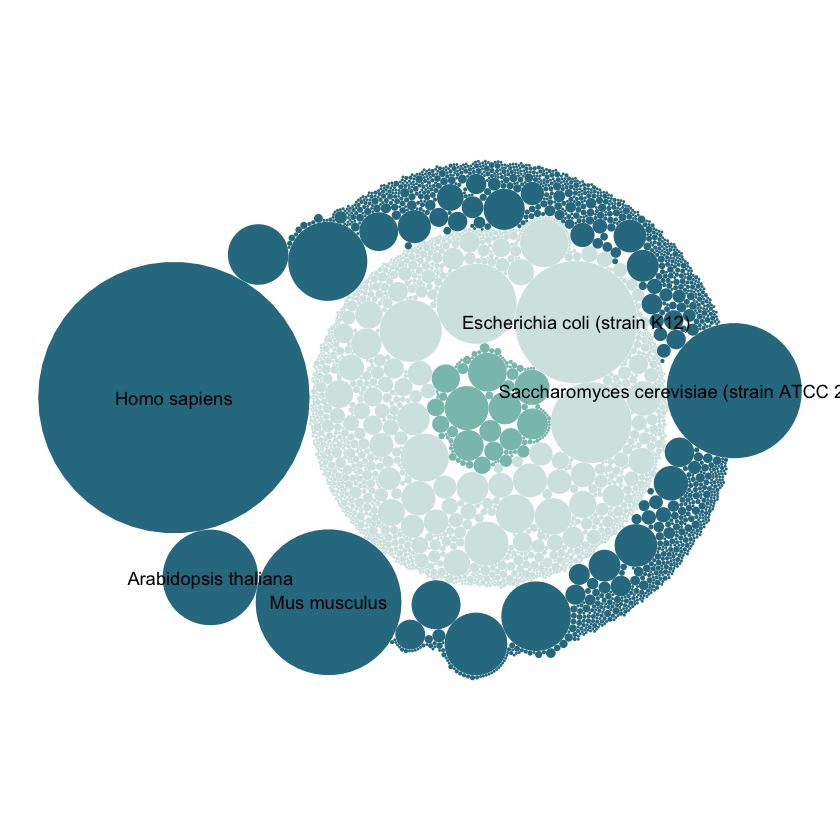

In [35]:
p1a = plot_circles(uniprot_data$pdb_structures_count, uniprot_data$domain, uniprot_data$organism)
ggsave("figures/01_packcircles_pdb.png", p1a)
p1a
p1b = plot_circles(uniprot_data$pdb_structures_count, uniprot_data$domain, uniprot_data$organism, show_top5 = TRUE)
ggsave("figures/01_packcircles_pdb_labeled.png", p1b)
p1b

[1] "species" "value"   "domain" 
[1] 14755
[1] 20417 17228 16396  8209  6733  6048
[1] 11989
[1] 1787 1038  623  519  509  501


Saving 7 x 7 in image


[1] "species" "value"   "domain" 
[1] 14755
[1] 20417 17228 16396  8209  6733  6048
[1] 11989
[1] 1787 1038  623  519  509  501


Saving 7 x 7 in image


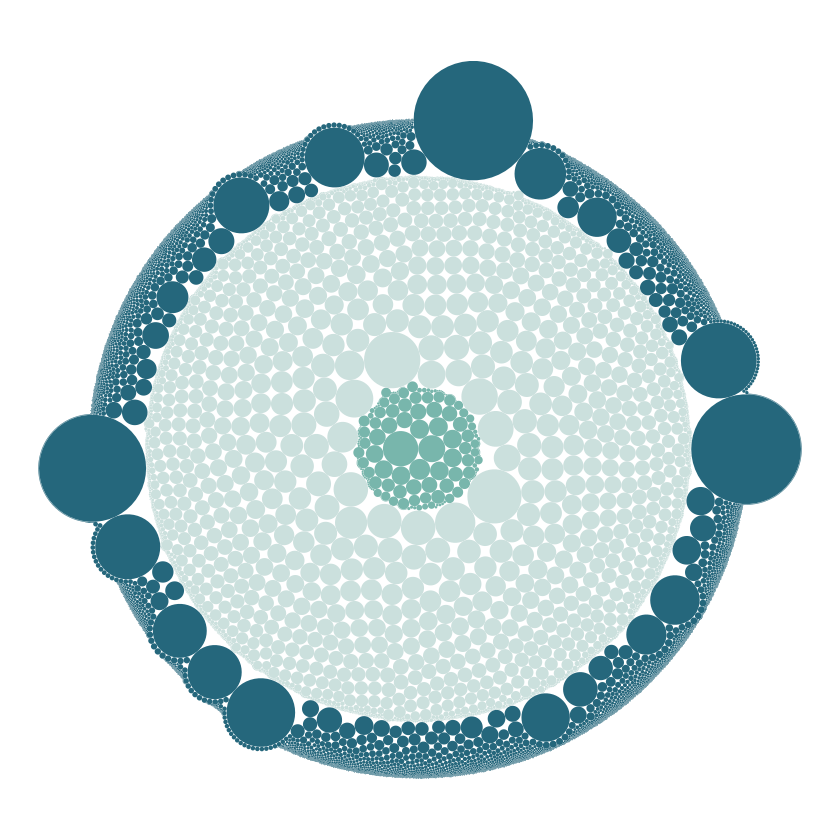

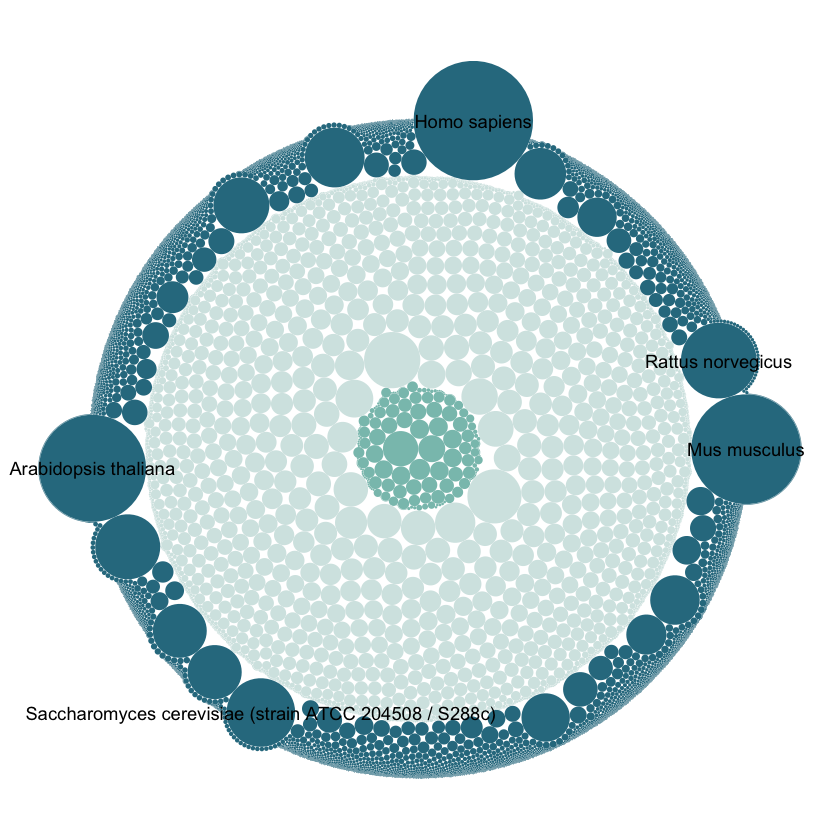

In [36]:
p2a = plot_circles(uniprot_data$reviewed_count, uniprot_data$domain, uniprot_data$organism)
ggsave("figures/02_packcircles_uniprot_reviewed.png", p2a)
p2a
p2b = plot_circles(uniprot_data$reviewed_count, uniprot_data$domain, uniprot_data$organism, show_top5 = TRUE)
ggsave("figures/02_packcircles_uniprot_reviewed_labeled.png", p2b)
p2b

# Uniprot TREMBL (catalogued, equivalent to AFDB)

# Total number of proteins predicted on earth

In [11]:
predicted_n_proteins <- read_parquet("predicted_n_proteins_larsen2017.parquet")
head(predicted_n_proteins)

index,domain,kingdom,n_species,n_genes,n_ten_thousand_species,n_genes_per_ten_thousand,organism_number
<int>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<chr>
0,Archaea,Archaea,17460000,5000,1746,50000000,10k_Archaea_0000000000
1,Archaea,Archaea,17460000,5000,1746,50000000,10k_Archaea_0000000001
2,Archaea,Archaea,17460000,5000,1746,50000000,10k_Archaea_0000000002
3,Archaea,Archaea,17460000,5000,1746,50000000,10k_Archaea_0000000003
4,Archaea,Archaea,17460000,5000,1746,50000000,10k_Archaea_0000000004
5,Archaea,Archaea,17460000,5000,1746,50000000,10k_Archaea_0000000005


In [12]:
nrow(predicted_n_proteins)

[1] 223834

[1] "species" "value"   "domain" 
[1] 223834
[1] 50000000 50000000 50000000 50000000 50000000 50000000
[1] 223834
[1] 50000000 50000000 50000000 50000000 50000000 50000000


Saving 7 x 7 in image


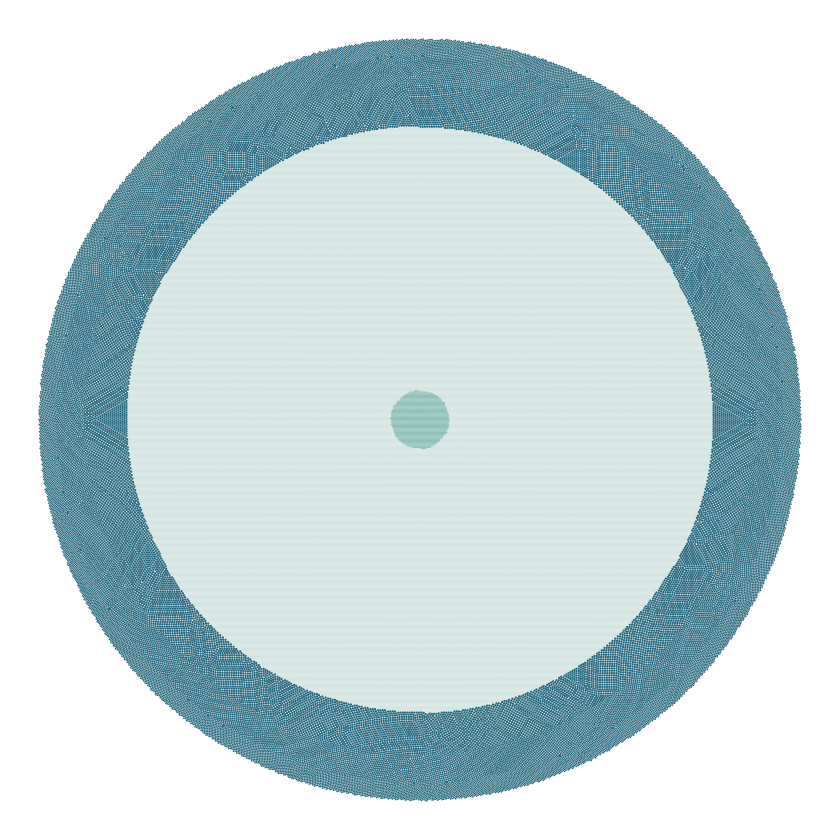

In [37]:

p4 = plot_circles(predicted_n_proteins$n_genes_per_ten_thousand, predicted_n_proteins$domain, predicted_n_proteins$organism_number)
ggsave("figures/04_n_predicted_proteins.png", p4)
p4